# 9 - Taller NO Evaluado de Classificación
## Minería de Datos 2019

### 1.- Selección de Datos
En este taller utilizaremos un dataset "bien portado", es decir, que no requiere mucho preprocesamiento (i.e. imputación, control de NaNs, variables no númericas, etc.). La idea es que usted se pueda concentrar en las métricas de selección de clasificadores, más que en el preprocesamiento de los datos. Para esto, cargue el dataset llamado `heart.csv` que puede encontrar en la sección 9 del aula (junto a este archivo). Este dataset contiene 303 pacientes con 13 características (resultados de exámenes o datos fisiológicos):
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

En la característica 14 encontrara el `target`, que corresponde a 1 si el paciente tiene una affección cardiaca y 0 si que está sano.

Como de costumbre, recuerde describir los datos utilizando pandas para una mayor comprensión.

In [ ]:
#Here your code

**PREGUNTA**: observando los estadísticos del dataset, está de acuerdo de que este dataset es "bien portado" (i.e., sin datos faltantes, datos balanceados, datos numéricos, etc.).

### 2.- Evaluación de Classificadores

Considere los siguientes clasificadores
1. Nearest Neighbors Classifier with 3 neighbors
1. Support Vector Machine with Linear Kernel with $C=0.03$
1. Support Vector Machine with Radial Basis Function with C=1.0, $\gamma=1.5$
1. Gaussian Process Classifier with a squared exponential kernel of $\sigma = 1.0$ and amplitude also $1.0$
1. Decision Tree with maximum depth of 6
1. Random Forest with maximum depth of 6 and 10 estimators 
1. Artificial Neural Network with $\alpha = 1$
1. AdaBoost
1. Naive Bayes
1. Quadratic Discriminant Analysis


Evalue el desempeño de los clasificadores
* Seleccione 25% de sus datos de forma aleatoria como conjunto de testing, y entrene cada clasificador.
* Imprima la curva ROC de cada clasificador y reporte su accuracy, F1-score y AUC

In [14]:
#Here your code

**PREGUNTA**: ¿Qué comportamiento observa en las métricas para distintos muestreos del conjunto testing? ¿Por qué este análysis sería considerado "trampa" en un caso real?

### 2.1 - Selección de Modelo
Seleccione ahora un conjunto de testing del 30% de los datos, usando una semilla aleatoria fija (por ejemplo 42).
Realice una validación cruzada con un K-Fold de 20 y reporte los promedios de accuracy, F1-score y AUC utilizando sólo los conjuntos de validación (no testing!).

In [31]:
#Here your code

**PREGUNTA**: Haga un ranking de los 3 mejores clasificadores para este problema (con una semilla fija la selección del conjunto de training). Justifique su elección utilizando las métricas computadas.

### 2.2 - Selección de Parámetros
Seleccione uno de los 3 clasificadores de su ranking. Seleccione un parámetro del modelo y haga un [gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) (o puede hacerlo manualmente también) para elegir un parámetro adecuado para su clasificador. Muestre sus resultados utilizando un gráfico con el parámetro como la abcisa (eje x).

In [33]:
#Here your code

**PREGUNTA**: ¿Tiene sentido el resultado considerando el sigificado del parámetro dentro del contexto de su clasificador? Justifique.

### 3 - Reporte de Resultados
Entrene ahora su clasificador con el 70% de los datos (training) utilizando el **mejor** parámetro encontrado mediante cross-validation, y otra instancia con el parámetro original entregado (o el que venía por defecto). Evalúe en el restante 30% (testing) usando los 3 criterios (i.e., accuracy, F1-score y AUC) para ambos casos. 

In [32]:
#Here your code

**PREGUNTA FINAL**: ¿Le fue útil realizar el ejercicio de cross-validation para obtener mejores resultados?. Comente brevemente porqué hacer cross-validation "no es trampa", haciendo referencia a lo comentado en la sección 2.

In [1]:
import pandas
df = pandas.read_csv('heart.csv')

In [2]:
%matplotlib inline
import seaborn as sns

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# for splitting data into training and testing
from sklearn.model_selection import train_test_split

# standardize features removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# multilayer perceptron classifier
from sklearn.neural_network import MLPClassifier

# K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Support vector machine, C-support vector classifier
from sklearn.svm import SVC

# Gaussian process classifier
from sklearn.gaussian_process import GaussianProcessClassifier

# radial basis function kernel (squared exponential kernel)
from sklearn.gaussian_process.kernels import RBF

# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble classifiers: Random forest and AdaBoost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Quadratic Discriminant Analysis classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics

In [5]:
# different classifiers
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.03, probability = True),
    SVC(gamma=1.5, C=1, probability = True),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=6),
    RandomForestClassifier(max_depth=6, n_estimators=10),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df[['target']].to_numpy().ravel()

C:\Users\og\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


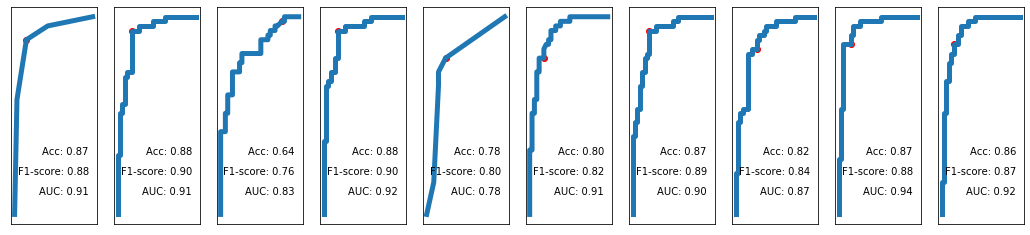

In [7]:
X = StandardScaler().fit_transform(X)
    
# test_size is 40% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
                
# iterate over classifiers
i=1
plt.figure(figsize=(20,4))
for name, clf in zip(names, classifiers):
        ax = plt.subplot(1 , len(classifiers) + 1, i)
        
        # fit the model using the training set
        clf.fit(X_train, y_train)
        
        # compute the mean accuracy of the classifier
        score = clf.score(X_test, y_test)

        # compute ROC curve
        y_test_pred = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        acc = metrics.accuracy_score(y_test, y_test_pred >= 0.5)
        f1 = metrics.f1_score(y_test, y_test_pred >= 0.5)
        ax.set_xlim(-.05, 1.05)
        ax.set_ylim(-.05, 1.05)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(0.95, 0.3, "Acc: %.2f" % acc, ha = 'right')
        ax.text(0.95, 0.2, "F1-score: %.2f" % f1, ha = 'right')
        ax.text(0.95, 0.1, "AUC: %.2f" % auc, ha = 'right')
        ax.plot(fpr, tpr, lw = 5)
        idx = np.argmin(np.abs(thresholds - 0.5))
        ax.scatter(fpr[idx], tpr[idx], marker = 'o', c = 'r')

        # counter 
        i += 1

In [8]:
from sklearn.model_selection import KFold
X = StandardScaler().fit_transform(X)
# test_size is 40% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=42)
n_splits = 20
kf = KFold(n_splits = n_splits)

for name, clf in zip(names, classifiers):
    auc,acc,f1,i=0,0,0,0
    for train, validation in kf.split(X_train, y_train):
        # fit the model using the training set
        clf.fit(X_train[train], y_train[train])
        
        # compute the mean accuracy of the classifier
        y_val=y_train[validation]
        X_val=X_train[validation]
        score = clf.score(X_val, y_val)

        # compute ROC curve
        y_val_pred = clf.predict_proba(X_val)[:, 1]
        fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_pred, pos_label=1)
        auc += metrics.roc_auc_score(y_val, y_val_pred)
        acc += metrics.accuracy_score(y_val, y_val_pred >= 0.5)
        f1 += metrics.f1_score(y_val, y_val_pred >= 0.5)
        i+=1
    print(name+":")
    print("acc: ",acc/i)
    print("auc: ",auc/i)
    print("f1: ",f1/i)

Nearest Neighbors:
acc:  0.7977272727272727
auc:  0.8433630952380952
f1:  0.8175668775668777
Linear SVM:
acc:  0.8163636363636364
auc:  0.8946428571428571
f1:  0.8312713675213678
RBF SVM:
acc:  0.5572727272727273
auc:  0.7748511904761904
f1:  0.692826976944624
Gaussian Process:
acc:  0.8390909090909091
auc:  0.9202976190476191
f1:  0.8517662892662893
Decision Tree:
acc:  0.7890909090909092
auc:  0.7976785714285715
f1:  0.7962267849109954
Random Forest:
acc:  0.7845454545454547
auc:  0.873809523809524
f1:  0.8060546479664129
Neural Net:
acc:  0.7927272727272727
auc:  0.9066666666666666
f1:  0.8162760493720246
AdaBoost:
acc:  0.7922727272727272
auc:  0.8633630952380953
f1:  0.8053911448029096
Naive Bayes:
acc:  0.8140909090909091
auc:  0.8947916666666667
f1:  0.8277851315351317
QDA:
acc:  0.8063636363636364
auc:  0.8888095238095237
f1:  0.8266049310166956


In [ ]:
#Cross Validation model selection
#Cross validation gridsearch :) 
